1. What is Feature Engineering <a href=#1>here</a>
2. Mutual Information <a href=#2>here</a>
3. Creating Features <a href=#3>here</a>
4. Clustering w/ K-Means <a href=#4>here</a>
5. Principal Component Analysis <a href=#5>here</a>
6. Target Encoding <a href=#6>here</a>

<a id="1"></a>
# What is Feature Engineering 

The goal of feature engineering is simply to make your data better suited to the problem at hand. You might perform feature engineering to:
* improve a model's predictive performance
* reduce computational or data needs
* improve interpretability of the results

For a feature to be useful, it must have a relationship to the target that your model is able to learn. Linear models, for instance, are only able to learn linear relationships. So, when using a linear model, your goal is to transform the features to make their relationship to the target linear.

Establishing baselines (***Mean Absolute Error scores***) like this is good practice at the start of the feature engineering process. A baseline score can help you decide whether your new features are worth keeping, or whether you should discard them and possibly try something else.

<a id="2"></a>
# Mutual Information
You might be presented with hundreds or thousands of features without even a description to go by. Where do you even begin?

A great first step is to construct a ranking with a feature utility metric, a function measuring associations between a feature and the target. The metric we'll use is called "mutual information". Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships. Mutual Informaion is:

* easy to use and interpret,
* computationally efficient,
* theoretically well-founded,
* resistant to overfitting, and,
* able to detect any kind of relationship

Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other.

The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you anything about the other. Conversely, in theory there's no upper bound to what MI can be. In practice though values above 2.0 or so are uncommon.

Here are some things to remember when applying mutual information:

* MI can help you to understand the relative potential of a feature as a predictor of the target, considered by itself.
* It's possible for a feature to be very informative when interacting with other features, but not so informative all alone. MI can't detect interactions between features. It is a univariate metric.
* The actual usefulness of a feature depends on the model you use it with. A feature is only useful to the extent that its relationship with the target is one your model can learn. Just because a feature has a high MI score doesn't mean your model will be able to do anything with that information. You may need to transform the feature first to expose the association.

The scikit-learn algorithm for MI treats discrete features differently from continuous features. Consequently, you need to tell it which are which. As a rule of thumb, anything that must have a float dtype is not discrete. Categoricals (object or categorial dtype) can be treated as discrete by giving them a label encoding. (You can review label encodings in our Categorical Variables lesson.)

> Scikit-learn has two mutual information metrics in its `sklearn.feature_selection` module: one for real-valued targets (`mutual_info_regression`) and one for categorical targets (`mutual_info_classif`)

```py
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
```

| discrete | continous | categorical |
| --- | ---| --- |
| mutual_info_regression | mutual_info_classif | mutual_info_classif |

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Load data
df = pd.read_csv(r"C:\Users\core i5\Documents\GitHub\DataScience\datascience\Kaggle\data\ames\ames.csv\ames.csv")

# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()

    #factorizing == OrdinalEncoder
    for colname in X.select_dtypes(["object", "category"]):
        # X[colname] has values like "1", "2", "3", ... while _ (if it has a variable will recieve the unique values)
        X[colname], _ = X[colname].factorize()
        
    # All discrete features should now have integer dtypes. discrete_features is a list of Boolean values (true or false) that indicate whether a feature is discrete or not. If discrete_features[i] is true, then X[i] is discrete.
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    
    mi_scores = mutual_info_regression(
        X, y, discrete_features=discrete_features, random_state=0
    )
    
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


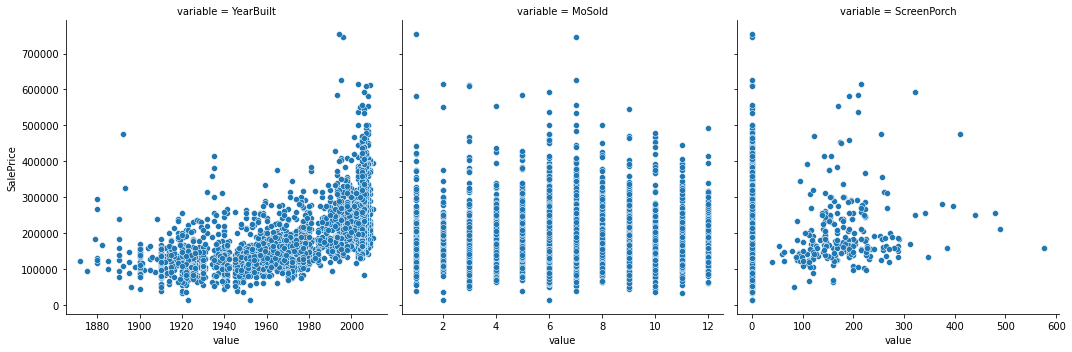

In [2]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

        YearBuilt is likely to have a higher MI score than the rest since it constrains the SaleProce to smaller ranges of possible values. 

In [3]:
X = df.copy()
y = X.pop('SalePrice')
mi_scores = make_mi_scores(X, y)

OverallQual     0.581262
Neighborhood    0.569813
GrLivArea       0.496909
YearBuilt       0.437939
GarageArea      0.415014
TotalBsmtSF     0.390280
GarageCars      0.381467
FirstFlrSF      0.368825
BsmtQual        0.364779
KitchenQual     0.326194
ExterQual       0.322390
YearRemodAdd    0.315402
MSSubClass      0.287131
GarageFinish    0.265440
FullBath        0.251693
Foundation      0.236115
LotFrontage     0.233334
GarageType      0.226117
FireplaceQu     0.221955
SecondFlrSF     0.200658
Name: MI Scores, dtype: float64


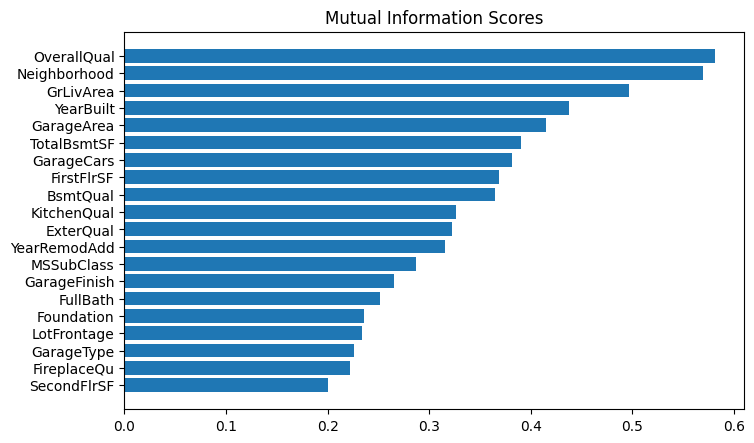

In [4]:
print(mi_scores.head(20))
# print(mi_scores.tail(20))  # uncomment to see bottom 20

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))
# plot_mi_scores(mi_scores.tail(20))

Some common themes among most of these features are:

* Location: Neighborhood
* Size: all of the Area and SF features, and counts like FullBath and GarageCars
* Quality: all of the Qual features
* Year: YearBuilt and YearRemodAdd
* Types: descriptions of features and styles like Foundation and GarageType.
---
These are all the kinds of features you'll commonly see in real-estate listings (like on Zillow), It's good then that our mutual information metric scored them highly. On the other hand, the lowest ranked features seem to mostly represent things that are rare or exceptional in some way, and so wouldn't be relevant to the average home buyer

<a id="3"></a>
# Creating Features

<a id="4"></a>
# Clustering with K_Means

<a id="5"></a>
# Principal Component Analysis

<a id="6"></a>
# Target Encoding